This notebook demonstrates a mechanism for creating benchmarking tables for questions with flexible response options provided in multi-column outputs 
in Survey Monkey output files.
The benchmark tables are created with pivot: Attribute + Value structure and then used in Power BI visuals where similar attributes are grouped.

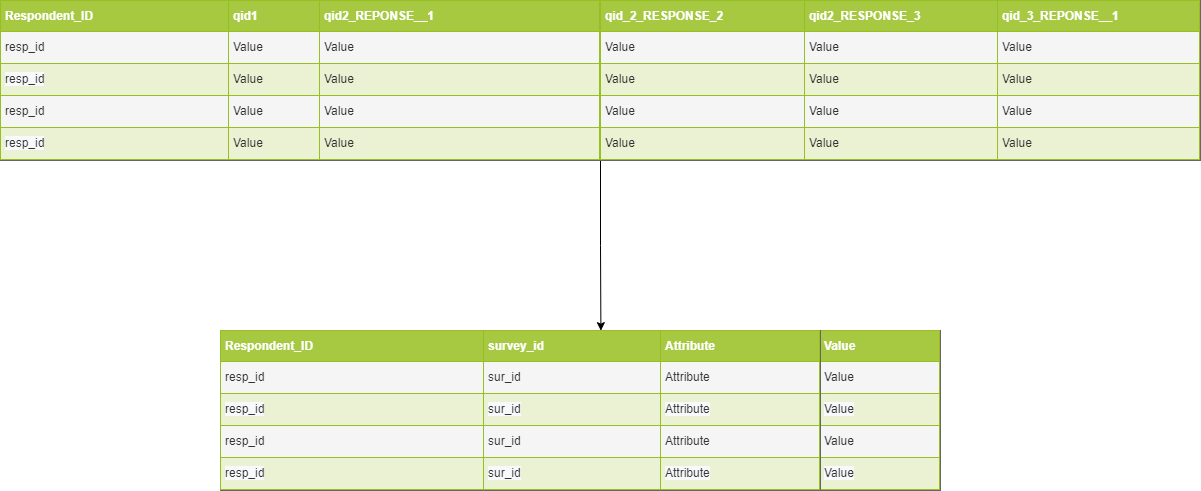

In [3]:
from IPython import display
from base64 import b64decode
base64_data = "MYQNjWQJCrGXJ13NcIVY9zo5CoE0CQqw29Za6tl5AiNX6LtQAAgsREAAshFWhNQoYwzViO9QKASFWtweEEKvb/at1BOYREGLNo2YfAnMKCLHmhLMbgY4LCAA63sE9aJ4x3INObmgThVgN7ZhE1RJiJYJUDIEOCQixOtSZmtJ8ASFW8/tIDQksQ0AAsAx1x0wpYAyn1FRWGQEhVhmt9m0rxGpfn6kxgUULCLEWLax8AjkBIZbhQIDAOAEBgHHRdgFjuO092N76C7Ha23dFai7EKqJkGwL9EhBi9au/tXbJAkKsJXeAwxNoqIAAoKEdo1qFBYzhwlQ2TCwgxEoM2rDihFgN6xDVIdAAASFWAzpBFfojIMTqT19rKYEyAgKAMlq2baKAMdzEXulHnYRY3e5nIVa3+1frCMwjIMSaR80+BOYUEGLNCWc3Ah0XEAB0vIN70DxjuAed3NAmCrEa2jGJqiXESgSpGAIdEhBidagzNaX5AkKs5veRGhJYhoAAYBnqjplSwBhOqamsMgJCrDJa7dtWiNW+PlNjAosWEGItWlj5BHICTQqx1q9fH84999ywbt26sP3226/opyuuuCJcf/314eSTTw5r1qzRhwQILFig7gBg48aN4X3ve1848sgjw3777beidV/+8pfD+eefH84444xHXBsWzKD4FgvMGsMXXHBBuOuuu1bMK/fdd184/fTTw7HHHht23333ELfZbbfdwuGHH/4IiTguL7vssnD88ceHc845Z+zYncY3bc5rMbuqhxDGhViT3sfMen+TjTPvf5oztIRYzekLNSHQFAEhVlN6Qj16IdCkEGsa+Kw3eb3oLI0kUKPArACgxqoEIVad2t051rQxHAOkj3/844PGvvKVrxwEVvFVJsTKpKYFsEKs7oynMi0ZF2LFMffud787vP3tbx+Ot2zsHHDAAWOD0nhMIVYZ+Xq2FWLV4+woBNokIMRqU2+pa+sFxoVY2Rut2LhVq1YNVj9s2LAhnHTSSeHOO+8M++yzz3BFRPYG7Oqrrx5YnHLKKYM3Ytmbrm222SZceumlK/aZhDb6rXQs441vfGPYeeedw4EHHhgefPBBK7FaP+I0oC0CkwKAuDLloosuGjTjd3/3d8PrXve6MO7cjStU4sqBm2++OXzkIx8J9957b3ja05428RweDQJimdk1Jx7nxhtvtBKrLYOnIfWcFmLFL0ay1x133DEYx/n5LM47RxxxRPjTP/3T4dy26667rhjLhx56aPibv/mb4UqsODf+5V/+5WCezObCSedGPN5//s//Odx0003D+XHSPNsQTtUoITAuxBoXWOWDrXiNjO95stcHP/jBwarUfIgVg9dsZeDoNXP0/Vi2f4lq27SggBCrIJTNCPRIQIjVo87W1OULTAqx4ofH+G1hfAMVv5mOb8hf//rXD/47fwvGNddcE7IPAHG7eEtFvLXi1ltvHbwZy97Ix33iK75xLxJiZW/mYx322muvwW1G8WU5/fLHjBr0Q2BcAJD/MBUVzjvvvPBbv/VbA5D8rcD57WKIFVcfnHnmmcPVB+ME8x/I9txzz8G14zd+4zcGoXi8fgix+jHuUrZyUogVx1o2dnfYYYfhvBVvY5+2EiuO6/xYHr2d8Nvf/vbwS59sxc20cyPeypidN3G7SfOsW+hTjop6ypr0TKzRVeXxv+N7qBiI5ldp5beL19DsS4FpIVb+fdboWK2n1f05ihCrP32tpQSKCttaaCgAACAASURBVAixikrZjkACgWkrsbIl76O38uS/Wb722muHIVa+OtP2GX3eVbZfvtwYgmVv2uIbeMvpE3S2IgiUEJgVYuU/WM9aiVXkeVb5EGvHHXdcEYp5dlCJjrPpUGBSiBXH03/7b/8trF27dvCMxfjh/xd+4ReGX9pMeibW6Lw2GmLlbwnLnqUVVx9OCnjzIVac8/LniTHf7oE8KcTK9+vq1aunPgcwv5p1VoiVBf/Zl43z3uLabvX6ai/Eqs/akQi0RUCI1ZaeUs9OCEwKsUbfdOeXuMeGx1stspUV+duLxi1/jx8SirwhHw3H8g9yF2J1YrhpRIsEJgUAcYVAvMU4vmbdMpXdTpgPpCcR5D90xW18oG/RYGloVYuM4azq2a2xs1ZijftyZdyD3ecJsabNsw0lVq0JApNCrGnXufx7qVjsC17wguEt2UVDrHh7av6VXaN1VFoBIVZaT6UR6IKAEKsLvagNrREoGmIV+RCaf/Mfn+2Q/xBa5MHMVmK1ZtioaA8EZj3YfdrKqUm3wky7LcpKrB4MqpqbOG4Mj94eH6uUn7vi7YXTVmJNC7GylVj5Zx+NrsTKnxujK7GKzLM1EzrcnAKTQqxYXHbbX/zf2fOtJq3yG/0iIH87YX4sx5VY+XE7Z7XtVlBAiFUQymYEeiQgxOpRZ2vq8gWKhFijb/rjm/DLL798sBrjk5/85PBN2LhnYmUrs8o+EyvKZM8H8Uys5Y8TNeifwLgAIHt+S/YQ7PwzsbLn6I2er/nnuRQNsbIyslDAM7H6N/5StHjSLbGjt7fmQ6fnPe95c4dYsc4xdIjhVP6ZWJPOjWnPxMrPs5NuwU9hpIzFCEwLsfI/WpOtaM+HWNlthtl4Gn0mVhw3WbgVV++Ne5+V/TBG9mzTxbSyv6UKsfrb91pOYJKAEMvYIFCjQJEQK1Yn/0th+VsJs4ArW8Kev53w4osvHrTkuuuuGy6Ln/YhdtKvE8Yy4hu122+/ffgMkxqJHIpALwXGBQCTfo00AmW3Gcbrw2//9m8PfnVt3tsJ4w9I5K85r3nNawY/FhFv2/KBvpfDca5GjxvDk75QyUKjP/qjPxqsIv7qV786uGU+/v/4hU38UiX+OuG0lVj5XyfM/zLcpHNj06ZNg3Lja/RXgPPz7FyNt9NSBaaFWNn7pl122WX4YzWjv4x5zDHHhCuvvDKsW7ducO3Lxl02ZuL19eijjx78avORRx45eJ7btOvzUjE6eHAhVgc7VZMIVBQQYlUEtDuBMgLjQqwy+0/a1jOsUigqg8DyBGbdTri8mjkygWICxnAxJ1ulF5gWYqU/mhLrFhBi1S3ueASaLyDEan4fqWGHBOoMsUa/Jcwz+ta5Q4NKUzohsIgAILuNZhxQ9mDtTuBpRCMEFjGGG9EwlWi8gBCr8V1UqYJCrEp8dibQSQEhVie7VaOaKrCoEKup7VUvAgSKCQgAijnZqrkCxnBz+6brNRNidbuHhVjd7l+tIzCPgBBrHjX7EJhTQIg1J5zdCHRcQADQ8Q7uQfOM4R50ckObKMRqaMckqpYQKxGkYgh0SECI1aHO1JTmCwixmt9HakhgGQICgGWoO2ZKAWM4paayyggIscpotW9bIVb7+kyNCSxaQIi1aGHlE8gJCLEMBwIExgkIAIyLtgsYw23vwfbWX4jV3r4rUnMhVhEl2xDol4AQq1/9rbVLFhBiLbkDHJ5AQwUEAA3tGNUqLGAMF6ayYWIBIVZi0IYVJ8RqWIeoDoEGCAixGtAJqtAfASFWf/paSwmUERAAlNGybRMFjOEm9ko/6iTE6nY/C7G63b9aR2AeASHWPGr2ITCngBBrTji7Eei4gACg4x3cg+YZwz3o5IY2UYjV0I5JVC0hViJIxRDokIAQq0OdqSnNFxBiNb+P1JDAMgQEAMtQd8yUAsZwSk1llREQYpXRat+2Qqz29ZkaE1i0gBBr0cLKJ5ATEGIZDgQIjBMQABgXbRcwhtveg+2tvxCrvX1XpOZCrCJKtiHQLwEhVr/6W2uXLCDEWnIHODyBhgoIABraMapVWMAYLkxlw8QCQqzEoA0rTojVsA5RHQINEBBiNaATVKE/AjHE8iJAgAABAgQIEEgncMMlB4dnvfxz6QpUUqMEYv9ecMEFjaqTyhAgsDwBIdby7B25hwIxxHrxAZf1sOWaTIDANIFPX3+ka4Mh0moBY7jV3dfqysexF0OOd511XKvbofLjBbL+FWIZIQQIZAJCLGOBQI0CQqwasR2KQIsEBAAt6ixVHStgDBsYyxIQYi1Lvp7jCrHqcXYUAm0SEGK1qbfUtfUCQqzWd6EGEFiIgABgIawKrVHAGK4R26FWCAixuj0ghFjd7l+tIzCPgBBrHjX7EJhTQIg1J5zdCHRcQADQ8Q7uQfOM4R50ckObKMRqaMckqpYQKxGkYgh0SECI1aHO1JTmCwixmt9HakhgGQICgGWoO2ZKAWM4paayyggIscpotW9bIVb7+kyNCSxaQIi1aGHlE8gJCLEMBwIExgkIAIyLtgsYw23vwfbWX4jV3r4rUnMhVhEl2xDol4AQq1/9rbVLFhBiLbkDHJ5AQwUEAA3tGNUqLGAMF6ayYWIBIVZi0IYVJ8RqWIeoDoEGCAixGtAJqtAfASFWf/paSwmUERAAlNGybRMFjOEm9ko/6iTE6nY/C7G63b9aR2AeASHWPGr2ITCnwLgQa7vVT52ztMXvdv+mbyz+II5AgEAYFwA04drgGmBwFhVo6hguWv9sO2O+rNjytx8XYi3r+mn8pB8PQqz0pkok0HYBIVbbe1D9WyUgxGpVd6ksgdoEmhoA+EBW2xBo/YGaOobLwhrzZcWWv70Qa/l9sMgaCLEWqatsAu0UEGK1s9/UuqUCTQqxbrvttvDhD30onHrqqWH7HXZYIfrZz342XP8Pfx/WvuklYfXqLVuqrdoE2iNQdwCwcePGcMZ73xOOPOrosP/++6+AuvHGG8N5550bzjrzrLDq0Xe1B1FNlyowawx/5Lzzwt133xVOeevbwpo1awZ1vW/DhnDaaaeFNxx3XNhjjz1C3OZJT35yOOKIIx7RljguL/vMpeGEE98UPnD2H48du9MAps15+f2EWEsdRnMdfFyI9b8/98+D9zH58RYLz97fjP57duBsnE36+6wKGj+zhMr/XYhV3sweBLouIMTqeg9rX6MEmhRiTYMRYjVq2KhMDwRmBQB1Egix6tTuzrGmjeEYIH38v/z5oLGv/E+/PwisyoZYmdS0AFaI1Z3xVKYl40Ks739ndTj9XaeFde84dTjesrFzwH949tigNB5TiFVGvp5thVj1ODsKgTYJCLHa1Fvq2nqBcSFW9kZr0LhVqwarH+7dsCG8+U0nhjvvvDPss+++g3+Lq6WyN2BXXXXVYPO3vX3d4I1Y9qZr6222Cf/9059esc8ktNFvpWMZbzh2bdh5553Dc3/xF8O/PviglVitH3Ea0BaBSQFAXJly4YWfGDTj937vFeGYtWvDuHM3rlCJKwe+/vWvh/PO/XD4/ve/H57xjGc8YhXCpCAglpldc+JxbrjxBiux2jJ4GlLPaSFW/GIke33z9tsH4zg/n8V558gjjwp/8icXDOe2XXfddcVYPvSwF4W/ufKvhyux4tz4yUsuGcyT2Vw46dx4/TFrwzvesS7c9LWvDefHSfOslTQNGVAlqjEuxNry4d0Hq03zgVUcH1mwde+99w7e82SvD5973mBVaj7E+vOPfWy4MnA0PB19P5btb/yU6LiCmwqxCkLZjECPBIRYPepsTV2+wKQQK354fMep7xy8gYq3V7zlpLeEtWuPHfx3/haMq6++OmQfAOJ2H/jA2eGEE04Mt9x66+DNWPZGPu4TX/GDQpEQK3szH+uw9957D974xZfbCZc/ZtSgHwLjAoB/uemhwe1TMZyKrw9/+EPhJS956c/+d+5W4PyHrhhiveu0Pwrv/+Ozh6sPxgnmP5A9Zc89B9eco446ehCKx+uHEKsf4y5lKyeFWHGsZWN3xx12GM5b8YuZabcTxnGdH8ujtxPe8a1vDb/0yYKJaedGDLuy8yZuN2me/eGq9SlZlFWDwKRnYo3eOhj/O76HOuxFL1qxSiu/XbyGZtfdaSFW/n1Wfqw+5ombamhxvw4hxOpXf2stgSICQqwiSrYhkEhg2kqsbMl7/lae+CY//83yF669dhhi5as0bZ/R511l++XLjSFY9qYtPqsk+7AgxErU8YohMENgVoiVPUMoFjNzJda/Pc9q0rkfy8iHWDvuuOOKUCxfvmdiGbpFBSaFWHE8/dVffSq84Q3HDZ6FFT/8H/jc5w6/tJn0TKzReW00xMqvsMmepfW0pz1tYsCbD7HinJc99210njXmi/Z4c7abFGLlr2Wr16yZ+hzA/GrWWSFWFvxnXzbmr6c/t89WzYHpSE2EWB3pSM0gkFBAiJUQU1EEZglMCrFGV1Xkl7jHMuOtFtnKivztReOWv8cPCUUeYDsajuUfgCrEmtWT/k4grcCkACCuEHjPu08fHGzWLVPZ7YT5QHpSLfMfuuI2PtCn7c8+llZkDGcu2a2xs1ZijftyZdyD3ecJsSbNs1bStG/0Tgqxpl3n8u+lYosPOeSQ4S3ZRUOseHtq/hWv0b9y8M+3D7DhNRZiNbyDVI/AEgSEWEtAd8j+ChQNsYp8CM2/+Y/Pdsh/CB39BnucuJVY/R2HWt48gVkPdp+2cmrSrTD51VujLbYSq3ljoO01GjeGH/7BE1bcthfbmJ+74u2F01ZiTQuxspVY+Yd1j67Eyp8boyuxJs2znmnUvpE4KcSKLclu+4v/O/vly0mr/Ea/CMjfTph/1ENciZUft3kx4yf9+BFipTdVIoG2Cwix2t6D6t8qgSIh1ugzseKb8M985tLBsz8uvvji4Zuwcc/EylZmlX0mVkTMng/imVitGlIq2xGBcQFA/In4/EOw88/Eyp6jlz9f512JlZWRhQKeidWRQVVzMybdEpv/giVWKR86/fLznjd3iBXLimM+hlP5Z2JNOjemPRMrP8+6nbDmgZPgcNNCrPyP1mQr2vMhVnabYTaeRp+Jdffddw1XaMXVe+PeZ2U/jBGfK+p2wgQdOlKEECu9qRIJtF1AiNX2HlT/VgkUCbFig/K/FJa/lTALuLIl7PnbCS+68MKBxd/93ReHy+KnrcSY9OuEsYwTTjwxrF+/PrzytYeG1au3bJWxyhJoo8C4ACD7da3RXyON7ctuM4zXh5e9/OWDX12bN8SKPyCRv+a87nWvD7feesvgRyN8oG/jaFpOnceN4Yv+7JpBZUZ/ZCQLjU5/1+nhIx85L3zlK18Z3DL/1a9+dXD7bLwtK/464bSVWPlfJ8zmwmnnxqaNGwdf1sTX6K8A5+dZK2mWM36qHHVaiJW9b9pt112Hv9Y6+suYx77huPDXV1wRTj311MEP5WTjLhsz8fr6my9+8eBXm4886ujB89wm/Vq08VOlJ8fvK8RKb6pEAm0XEGK1vQfVv1UC40Ks7VY/tXIb8r9ONi24Knsgb8bKitmewHwCs24nnK/U6nu5BlQ37EsJTR3DZf2N+bJiy99+WohVd+2Mn/TiQqz0pkok0HYBIVbbe1D9WyVQZ4g1+i1hHir/rfM0QG/GWjW8VLbFAosIALLbaMaxZA/WnkXmGjBLyN8zgUWM4WXoGvPLUK92TCFWNb+m7y3EanoPqR+B+gWEWPWbO2KPBRYVYi2K1Jv5Rckql8BKgaYGAK4BRmpRgaaO4aL1z7Yz5suKLX97Idby+2CRNRBiLVJX2QTaKSDEame/qXVLBcaFWC1timoTIJBQYFwAkLB4RRFYuIAxvHBiB5ggMC7EgtUdASFWd/pSSwikEhBipZJUDoECAkKsAkg2IdBDAQFADzu9Y002hjvWoS1qjhCrRZ01R1WFWHOg2YVAxwWEWB3vYM1rloAQq1n9oTYEmiIgAGhKT6jHvALG8Lxy9qsqIMSqKtjs/YVYze4ftSOwDAEh1jLUHbO3AkKs3na9hhOYKiAAMEDaLmAMt70H21t/IVZ7+65IzYVYRZRsQ6BfAkKsfvW31i5ZQIi15A5weAINFRAANLRjVKuwgDFcmMqGiQWEWIlBG1acEKthHaI6BBogIMRqQCeoQn8EhFj96WstJVBGQABQRsu2TRQwhpvYK/2okxCr2/0sxOp2/2odgXkEhFjzqNmHwJwCQqw54exGoOMCAoCOd3APmmcM96CTG9pEIVZDOyZRtYRYiSAVQ6BDAkKsDnWmpjRfQIjV/D5SQwLLEBAALEPdMVMKGMMpNZVVRkCIVUarfdsKsdrXZ2pMYNECQqxFCyufQE5AiGU4ECAwTkAAYFy0XcAYbnsPtrf+Qqz29l2RmguxiijZhkC/BIRY/epvrV2yQAyxvAgQIECAAAECBNIJ3HDJweFZL/9cugKV1CiB2L8XXHBBo+qkMgQILE9AiLU8e0fuoUAMsV7xnK/2sOWaTIDANIFPfOlprg2GSKsFjOFWd1+rKx/HXgw5zj777Fa3Q+XHC2T9K8QyQggQyASEWMYCgRoFhFg1YjsUgRYJCABa1FmqOlbAGDYwliUgxFqWfD3HFWLV4+woBNokIMRqU2+pa+sFhFit70INILAQAQHAQlgVWqOAMVwjtkOtEBBidXtACLG63b9aR2AeASHWPGr2ITCngBBrTji7Eei4gACg4x3cg+YZwz3o5IY2UYjV0I5JVC0hViJIxRDokIAQq0OdqSnNFxBiNb+P1JDAMgQEAMtQd8yUAsZwSk1llREQYpXRat+2Qqz29ZkaE1i0gBBr0cLKJ5ATEGIZDgQIjBMQABgXbRcwhtveg+2tvxCrvX1XpOZCrCJKtiHQLwEhVr/6W2uXLCDEWnIHODyBhgoIABraMapVWMAYLkxlw8QC/397ZxerRXHG8eHGc9oSgd6UeqxIm0ZFYlTaiIb2Sg0qHqhaU6IN7YU9cAAVK1I9npqIaP2on3DwNFZLylesWkRRo3jTkmrSIsYg2jQVoWiBC8CGttAbm2fbeTNn3d13d8+8uzM7v/dGkNmZ5/k9z+7O/veZWUQsy0Ad6w4Ry7GAYA4EHCCAiOVAEDAhHAKIWOHEGk8hUIQAAkARWrR1kQA57GJUwrAJEavZcUbEanZ88Q4CZQggYpWhxjEQKEkAEaskOA6DQMMJIAA0PMABuEcOBxBkR11ExHI0MJbMQsSyBJJuINAgAohYDQomrrhPABHL/RhhIQTqIIAAUAd1xrRJgBy2SZO+ihBAxCpCy7+2iFj+xQyLIdBpAohYnSZM/xAwCLgkYu3Zs0etWrVKDQwMqHHjxo2I05YtW9T27dvVLbfcorq7u4khBCDQYQJVCwDHjh1T9913n+rt7VVnn332CO/efvtt9fjjj6t77733M9eGDmOge48JtMvh4eFhdeDAgRH3lU8++UStWLFCLVy4UE2aNElJm5NPPllddtllnyEhebl582Z1ww03qEceeSQxd7PwZd3zPMaO6UqpJBErbR7Tbn6j84z5jzuphYjlTiywBAKuEEDEciUS2BEEAZdErCzg7SZ5QQQLJyFQIYF2AkCFpihErCppN2esrBwWAWnNmjWRs/PmzYsEK/kVEbE0qSwBFhGrOflUxJMkEUty7u6771a33XZbK9907kybNi1RKJUxEbGKkK+mLSJWNZwZBQI+EUDE8ila2Oo9gSQRS0+0xLkxY8ZE1Q9HjhxRS5cuVfv371dTpkxpVUToCdjWrVsjFsuWLYsmYnrSNXbsWLVp06YRx6RBi7+Vlj6uv/56NXHiRDV9+nR19OhRKrG8zzgc8IVAmgAglSnr1q2L3LjmmmtUX1+fSjp3pUJFKgfef/99tXr1anX48GE1derU1HM4LgRIn/qaI+Ps2LGDSixfkscRO7NELHkxon/79u2L8ti8n8l9Z9asWeqJJ55o3dt6enpG5PLMmTPVK6+80qrEknvj008/Hd0n9b0w7dyQ8e644w61a9eu1v0x7T7rCE7MKEAgScRKEqxMYUuukTLn0b9HH300qko1RSwRXnVlYPyaGZ+P6eMLmE3TnAQQsXKCohkEAiKAiBVQsHG1fgJpIpY8PMrbQplAyZtpmZDPnz8/+ru5BOP1119X+gFA2smSCllasXv37mgypifycoz8ZOKeR8TSk3mx4fTTT4+WGcmPcvr6cwYLwiCQJACYD1NCYWhoSF155ZUREHMpsNlORCypPrj//vtb1QdJBM0HssmTJ0fXjssvvzwSxeX6gYgVRt7Z9DJNxJJc07k7fvz41n1LlrFnVWJJXpu5HF9O+PHHH7de+uiKm6xzQ5Yy6vNG2qXdZ1lCbzMrqukrbU+seFW5/F3mUCKImlVaZju5huqXAlkiljnPiudqNV6HMwoiVjixxlMI5CWAiJWXFO0gYIFAViWWLnmPL+Ux3yxv27atJWKZ5mQdE9/vSh9n9isimJ60yQSecnoLwaYLCBQg0E7EMh+s21Vi5dnPyhSxJkyYMEIUY++gAoGjaYtAmogl+fTss8+q/v7+aI9Fefg/77zzWi9t0vbEit/X4iKWuSRM76Ul1YdpAq8pYsk9zzxPyHm/EzlNxDLj2tXVlbkPoFnN2k7E0sK/ftlYdomr39Srsx4RqzrWjAQBXwggYvkSKexsBIE0ESs+6TZL3MVxWWqhKyvM5UVJ5e/ykJBnQh4Xx8yN3BGxGpFuOOERgTQBQCoEZImx/NotmdLLCU1BOg2B+dAlbXig9yhZHDU1Tw5r0/XS2HaVWEkvV5I2di8jYmXdZx1FjFkpBNJErKzrnDmXkm4vvPDC1pLsvCKWLE81f/oaTaDsEkDEssuT3iDQBAKIWE2IIj54QyCviJXnIdSc/MveDuZDaJ6NmanE8iZtMDQAAu02ds+qnEpbCpO1LIpKrACSqmIXk3I4vjxeTDLvXbK8MKsSK0vE0pVY5t5H8Uos89yIV2Lluc9WjJDhShJIE7GkO73sT/6s97dKq/KLvwgwlxOauSyVWGbeljSbw3ISQMTKCYpmEAiIACJWQMHG1foJ5BGx4pN+mYS/8MILUTXGxo0bW5OwpD2xdGVW0T2xhIzeH4Q9serPEywIj0CSAKD3b9GbYJt7Yul99OLnq7mfS14RS/ehRQH2xAov/2x4nLYkNr681RSdZsyYUVrEEptFdBBxytwTK+3cyNoTy7zPpi3Bt8GIPjpDIEvEMj9aoyvaTRFLLzPU+RTfE0vyRotbUr2XNM/SH8bQe5t2xstwe0XECjf2eA6BNAKIWOQGBCokkEfEEnPML4WZSwm1wKVL2M3lhOvXr488efPNN1tl8VkPsWlfJ5Q+ZKK2d+/e1h4mFSJiKAgESSBJAEj7GqkA0ssM5fpw9dVXR19dK7ucUD4gYV5zrrvuuuhjEbJsiwf6INOxlNNJOZz2QkWLRnfeeWdURbxz585oybz8V17YyEsV+TphViWW+XVC88twaefG8ePHo37lF/8KsHmfLeU8B9VKIEvE0vOmk046qfWxmviXMRcsWKBefvllNTAwEF37dN7pnJHr65w5c6KvNvf29kb7uWVdn2uF0cDBEbEaGFRcgsAoCSBijRIgh0OgCIEkEavI8Wlt2cPKBkX6gEB9BNotJ6zPMkaGQD4C5HA+TrSyTyBLxLI/Gj1WTQARq2rijAcB9wkgYrkfIyxsEIEqRaz4W0ITI2+dG5RUuNIIAp0QAPQymiRAemPtRsDDCScIdCKHnXAMI5wngIjlfIhGZSAi1qjwcTAEGkkAEauRYcUpVwl0SsRy1V/sggAE8hFAAMjHiVbuEiCH3Y1N0y1DxGp2hBGxmh1fvINAGQKIWGWocQwEShJAxCoJjsMg0HACCAAND3AA7pHDAQTZURcRsRwNjCWzELEsgaQbCDSIACJWg4KJK+4TQMRyP0ZYCIE6CCAA1EGdMW0SIIdt0qSvIgQQsYrQ8q8tIpZ/McNiCHSaACJWpwnTPwQMAohYpAMEIJBEAAGAvPCdADnsewT9tR8Ry9/Y5bEcESsPJdpAICwCiFhhxRtvayaAiFVzABgeAo4SQABwNDCYlZsAOZwbFQ0tE0DEsgzUse4QsRwLCOZAwAECiFgOBAETwiGAiBVOrPEUAkUIIAAUoUVbFwmQwy5GJQybELGaHWdErGbHF+8gUIYAIlYZahwDgZIEELFKguMwCDScAAJAwwMcgHvkcABBdtRFRCxHA2PJLEQsSyDpBgINIoCI1aBg4or7BBCx3I8RFkKgDgIIAHVQZ0ybBMhhmzTpqwgBRKwitPxri4jlX8ywGAKdJoCI1WnC9A8BgwAiFukAAQgkEUAAIC98J0AO+x5Bf+1HxPI3dnksR8TKQ4k2EAiLACJWWPHG25oJIGLVHACGh4CjBBAAHA0MZuUmQA7nRkVDywQQsSwDdaw7RCzHAoI5EHCAACKWA0HAhHAIiIjFDwIQgAAEIAABCEDAHoG3Nlykzp37mr0O6ckpAhLf4eFhp2zCGAhAoD4CiFj1sWfkAAmIiHXFtM0Beo7LEIBAFoHntvdybSBFvCZADnsdPq+Nl9wTkeOuBxZ77QfGJxPQ8UXEIkMgAAFNABGLXIBAhQQQsSqEzVAQ8IgAAoBHwcLURALkMIlRFwFErLrIVzMuIlY1nBkFAj4RQMTyKVrY6j0BRCzvQ4gDEOgIAQSAjmCl0woJkMMVwmaoEQQQsZqdEIhYzY4v3kGgDAFErDLUOAYCJQkgYpUEx2EQaDgBBICGBzgA98jhAILsqIuIWI4GxpJZiFiWQNINBBpEABGrQcHEFfcJIGK5HyMshEAdBBAA6qDOmDYJkMM2adJXEQKIWEVo+dcWEcu/mGExBDpNABGr04TpHwIGAUQs0gECEEgigABAXvhOgBz2PYL+2o+I5W/s8liOiJWHEm0gEBYBRKyw4o23NRNAxKo5AAwPAUcJIAA4GhjMyk2AHM6NBv/m4wAACw1JREFUioaWCSBiWQbqWHeIWI4FBHMg4AABRCwHgoAJ4RBAxAon1ngKgSIEEACK0KKtiwTIYRejEoZNiFjNjjMiVrPji3cQKEMAEasMNY6BQEkCSSLWiV2nleyt84f94/ifOz8II0AAAipJAHDh2sA1gOTMS8DVHM5rv25HzhclVn/7JBGrrusn+WM/HxCx7DOlRwj4TgARy/cIYr9XBBCxvAoXxkKgMgKuCgA8kFWWAt4P5GoOFwVLzhclVn97RKz6Y9BJCxCxOkmXviHgJwFELD/jhtWeEnBJxPrwww/VysceU4ODg2rc+PEjiL744otq+5/+qPpvukp1dZ3gKW3MhoA/BKoWAI4dO6bu/dk9qnf2HHXOOeeMALVjxw41NLRKPXD/A2rM5w74AxFLayXQLodXDw2pgwcPqGU/uVV1d3dHtn5y5Ihavny5WrR4sTr11FOVtPnKKaeoWbNmfcYXycvNz29SNy65ST380IOJuZsFIOueZx6HiFVrGpUaPEnE+t1rf4nmMWa+Sed6fhP//3pgnWdp/97OQPKnHaHi/46IVZwZR0Cg6QQQsZoeYfxzioBLIlYWGEQsp9IGYwIg0E4AqBIBIlaVtJszVlYOi4C05ldPRc7O+8EPI8GqqIilSWUJsIhYzcmnIp4kiViH/t6lVty1XA3cPtjKN507077xzUShVMZExCpCvpq2iFjVcGYUCPhEABHLp2hhq/cEkkQsPdGKnBszJqp+OHzkiPrxTUvU/v371ZQzz4z+n1RL6QnYq6++GjW/9baBaCKmJ11fGDtW/fa550YckwYt/lZa+li0sF9NnDhRnX/BBeqfR49SieV9xuGALwTSBACpTFm79teRG9de+321oL9fJZ27UqEilQPvvfeeGlq1Uh06dEidddZZn6lCSBMCpE99zZFx3trxFpVYviSPI3ZmiVjyYkT//rZ3b5TH5v1M7ju9vbPVL34x3Lq39fT0jMjlmZdcql55+aVWJZbcGzdu2BDdJ/W9MO3cmL+gX91++4Da9e67rftj2n2WShpHEqqAGUki1gmfToqqTU3BSvJDC1uHDx+O5jz6t3LVUFSVaopYTz35ZKsyMC6exudj+njyp0DgcjZFxMoJimYQCIgAIlZAwcbV+gmkiVjy8Hj74E+jCZQsr7h56c2qv39h9HdzCcbWrVuVfgCQdg8//JC68cYl6oPdu6PJmJ7IyzHykweFPCKWnsyLDWeccUY08ZMfywnrzxksCINAkgDw113/ipZPiTglv5UrH1NXXfXd//3ZWApsPnSJiHXX8jvVzx98qFV9kETQfCD76uTJ0TVn9uw5kSgu1w9ErDDyzqaXaSKW5JrO3Qnjx7fuW/JiJms5oeS1mcvx5YT7Pvqo9dJHCxNZ54aIXfq8kXZp99n/jNljEwt9VUAgbU+s+NJB+bvMoS659NIRVVpmO7mG6utulohlzrPMXP3il49X4HFYQyBihRVvvIVAHgKIWHko0QYClghkVWLpkndzKY9M8s03y7/ftq0lYpkmZR0T3+9KH2f2KyKYnrTJXiX6YQERy1Lg6QYCbQi0E7H0HkLSTdtKrP/vZ5V27ksfpog1YcKEEaKY2T97YpG6eQmkiViST8888xu1aNHiaC8sefiffv75rZc2aXtixe9rcRHLrLDRe2lNnTo1VeA1RSy55+l93+L3WXI+b8TdaZcmYpnXsq7u7sx9AM1q1nYilhb+9ctG83r6tSmfdwdMQyxBxGpIIHEDAhYJIGJZhElXEGhHIE3EildVmCXu0qcstdCVFebyoqTyd3lIyLOBbVwcMzdARcRqF0n+HQJ2CaQJAFIhcM/dK6LB2i2Z0ssJTUE6zUrzoUva8EBvN54h9pYnhzUXvTS2XSVW0suVpI3dy4hYafdZKmn8y940ESvrOmfOpcTjiy++uLUkO6+IJctTzZ9co7990df9A+i4xYhYjgcI8yBQAwFErBqgM2S4BPKKWHkeQs3Jv+ztYD6Ext9gJxGnEivcPMRz9wi029g9q3IqbSmMWb0V95hKLPdywHeLknL4039/acSyPfHRvHfJ8sKsSqwsEUtXYpmbdccrscxzI16JlXafZU8j/zIxTcQST/SyP/mz/vJlWpVf/EWAuZzQ3OpBKrHMvDWJkT/28wcRyz5TeoSA7wQQsXyPIPZ7RSCPiBXfE0sm4c8/vyna+2P9+vWtSVjSnli6MqvonlgCUe8Pwp5YXqUUxjaEQJIAIJ+INzfBNvfE0vvomedr2Uos3YcWBdgTqyFJVbEbaUtizRcsYpIpOn1rxozSIpb0JTkv4pS5J1bauZG1J5Z5n2U5YcWJY2G4LBHL/GiNrmg3RSy9zFDnU3xPrIMHD7QqtKR6L2mepT+MIfuKspzQQkBjXSBi2WdKjxDwnQAilu8RxH6vCOQRscQh80th5lJCLXDpEnZzOeG6tWsjFm+88YdWWXxWJUba1wmljxuXLFF79uxR8340U3V1neAVY4yFgI8EkgQA/XWt+NdIxT+9zFCuD9+bOzf66lpZEUs+IGFec/r65qvduz+IPhrBA72P2VSPzUk5vO6Xr0fGxD8yokWjFXetUKtXD6l33nknWjK/c+fOaPmsLMuSrxNmVWKZXyfU98Ksc+P4sWPRyxr5xb8CbN5nqaSpJ39GM2qWiKXnTSf39LS+1hr/MubCRYvVS1u2qMHBwehDOTrvdM7I9fU7V1wRfbW5d/acaD+3tK9Fkz+jiWTysYhY9pnSIwR8J4CI5XsEsd8rAkki1oldp43aB/PrZFnCVdGBmIwVJUZ7CJQj0G45YbleR38U14DRMwylB1dzuCh/cr4osfrbZ4lYVVtH/tgnjohlnyk9QsB3AohYvkcQ+70iUKWIFX9LaIIy3zpnAWQy5lV6YazHBDohAOhlNElY9Mba7ZBxDWhHiH/XBDqRw3XQJefroD66MRGxRsfP9aMRsVyPEPZBoHoCiFjVM2fEgAl0SsTqFFIm850iS78QGEnAVQGAawCZmpeAqzmc137djpwvSqz+9ohY9cegkxYgYnWSLn1DwE8CiFh+xg2rPSWQJGJ56gpmQwACFgkkCQAWu6crCHScADncccQMkEIgScQCVnMIIGI1J5Z4AgFbBBCxbJGkHwjkIICIlQMSTSAQIAEEgACD3jCXyeGGBdQjdxCxPApWCVMRsUpA4xAINJwAIlbDA4x7bhFAxHIrHlgDAVcIIAC4EgnsKEuAHC5LjuNGSwARa7QE3T4eEcvt+GAdBOoggIhVB3XGDJYAIlawocdxCGQSQAAgQXwnQA77HkF/7UfE8jd2eSxHxMpDiTYQCIsAIlZY8cbbmgkgYtUcAIaHgKMEEAAcDQxm5SZADudGRUPLBBCxLAN1rDtELMcCgjkQcIAAIpYDQcCEcAggYoUTazyFQBECCABFaNHWRQLksItRCcMmRKxmxxkRq9nxxTsIlCGAiFWGGsdAoCQBRKyS4DgMAg0ngADQ8AAH4B45HECQHXUREcvRwFgyCxHLEki6gUCDCCBiNSiYuOI+AUQs92OEhRCogwACQB3UGdMmAXLYJk36KkIAEasILf/aImL5FzMshkCnCSBidZow/UPAIICIRTpAAAJJBBAAyAvfCZDDvkfQX/sRsfyNXR7LEbHyUKINBMIigIgVVrzxtmYCImLxgwAEIAABCEAAAhCwR+CtDRepc+e+Zq9DenKKgMR3eHjYKZswBgIQqI8AIlZ97Bk5QAJ9fX0Beo3LEIAABCAAAQhAAAIQKE8AEas8O46EQNMI/Bfg8upSs4raTwAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

In [0]:
#Input and output hive schemas for surveys and benchmark tables
INPUT_SURVEY_SCHEMA = 'workplace_survey_refined'
BENCHMARK_SCHEMA = 'workplace_survey_agg'
#Backend ids for all questions with multiple column responses
COMPLEX_IDS = {"qid_carer_responsibilities", 
                "qid_activity_frequency", 
                "qid_activity_support",  
                "qid_location_productivity", 
                "qid_workspace_requirements", 
                "qid_meeting_frequency", 
                "qid_meeting_facilities", 
                "qid_meeting_length", 
                "qid_meeting_location_suitability",
                "qid_workplace_return",
                "qid_office_resorce_access_need",
                "qid_remote_work_equipment_access",
                "qid_remote_work_benefits" ,
                "qid_office_work_benefits", 
                "qid_remote_work_challenges", 
                "qid_office_work_challenges", 
                "qid_engagement", 
                "qid_wellbeing", 
                "qid_culture", 
                "qid_remote_working_days"
                ,"qid_positive_adjacency",
                "qid_office_workspace",
                "qid_preferred_remote_days" }

# Union Functions
Custom set of functions for union of dataframes with different numbers of columns

In [0]:
from pyspark.sql.functions import lit,col, concat


def __order_df_and_add_missing_cols(df, columns_order_list, df_missing_fields):
    """ return ordered dataFrame by the columns order list with null in missing columns """
    if not df_missing_fields:  # no missing fields for the df
        return df.select(columns_order_list)
    else:
        columns = []
        for colName in columns_order_list:
            if colName not in df_missing_fields:
                columns.append(colName)
            else:
                columns.append(lit(None).alias(colName))
        return df.select(columns)


def __add_missing_columns(df, missing_column_names):
    """ Add missing columns as null in the end of the columns list """
    list_missing_columns = []
    for col in missing_column_names:
        list_missing_columns.append(lit(None).alias(col))

    return df.select(df.schema.names + list_missing_columns)


def __order_and_union_d_fs(left_df, right_df, left_list_miss_cols, right_list_miss_cols):
    """ return union of data frames with ordered columns by left_df. """
    left_df_all_cols = __add_missing_columns(left_df, left_list_miss_cols)
    right_df_all_cols = __order_df_and_add_missing_cols(right_df, left_df_all_cols.schema.names,
                                                        right_list_miss_cols)
    return left_df_all_cols.union(right_df_all_cols)


def union_d_fs(left_df, right_df):
    """ Union between two dataFrames, if there is a gap of column fields,
     it will append all missing columns as nulls """
    # Check for None input
    if left_df is None:
        raise ValueError('left_df parameter should not be None')
    if right_df is None:
        raise ValueError('right_df parameter should not be None')
        # For data frames with equal columns and order- regular union
    if left_df.schema.names == right_df.schema.names:
        return left_df.union(right_df)
    else:  # Different columns
        # Save dataFrame columns name list as set
        left_df_col_list = set(left_df.schema.names)
        right_df_col_list = set(right_df.schema.names)
        # Diff columns between left_df and right_df
        right_list_miss_cols = list(left_df_col_list - right_df_col_list)
        left_list_miss_cols = list(right_df_col_list - left_df_col_list)
        return __order_and_union_d_fs(left_df, right_df, left_list_miss_cols, right_list_miss_cols)

#Complex Question Functions
Custom functions to process Survey Monkey output file dataframes

In [0]:
import re


def is_complex_qid_present(df, qid):
  """Check if question id is present in the survey datframe"""
  qid_col_re = re.compile("{}_RESPONSE_[a-zA-Z0-9_]+$".format(qid))
  #Example of qid present: "qid_client_engagment_RESPNSE_I_feel_engaged_in_the_process"
  if [c for c in df.columns if qid_col_re.match(c)]:
    return True
  return False

def qid_colomns_df(df, qid):
  """Returns a daaframe with Respondent_ID, survey_id + all the columns for qid"""
  qid_col_re = re.compile("{}_RESPONSE_[a-zA-Z0-9_/]+$".format(qid))
  qid_cols = ["Respondent_ID", 'survey_id'] + [c for c in df.columns if qid_col_re.match(c)] 
  return  df.select(*qid_cols) 

def remove_qid(qid, column_name):
  """Removes qid from QID_tab and _RESPONSE_ from column name to isolate
  response text"""
  no_qid_col = re.sub("{}_RESPONSE_".format(qid), "", column_name)
  no_qid_col = no_qid_col.replace("_", " ").rstrip() #remove _ and last whitespace
  return " ".join(no_qid_col.split())

def normalise_column_names(df):
  """Returns a dataframe with columns names without special characters:
  and whitespaces: replaced with underscores"""
  new_column_names = [ re.sub("[^0-9a-zA-Z$]+","_", c) for c in df.columns]
  return df.toDF(*new_column_names)

def unpivot_complex_question_df(df, qid):
  """Returns a dataframe with Respondent_ID, survey_id, Attribute, Value"""
  qid_cols_df = normalise_column_names(qid_colomns_df(df, qid))
  response_cols = [c for c in qid_cols_df.columns  if c not in ['Respondent_ID','survey_id']]
  n_rows = len(response_cols)
  col_stack = ["'{}', {}".format(remove_qid(qid,c), c) for c in response_cols]
  stack_expr = "stack({}, {}) as (Attribute, Value)".format(n_rows,','.join( col_stack))
  return qid_cols_df.selectExpr("Respondent_ID", "survey_id", stack_expr)

# Process Complex Question Benchmarks

In [0]:
from pyspark.sql.functions import lit
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, FloatType

def benchmark_complex_question(qid):
  """Create and save a benchmark table for a given question"""
  global INPUT_SURVEY_SCHEMA
  global BENCHMARK_SCHEMA
  
  schema = StructType([
    StructField('survey_id', IntegerType(), False),
    StructField('survey_name', StringType(), False),
    StructField('Respondent_ID', IntegerType(), False),
    StructField('Attribute', StringType(), True),
    StructField('Value', StringType(), True)
    ])

  df = spark.createDataFrame([], schema)

  #encorporate every survey into the benchmark
  for t in spark.catalog.listTables(INPUT_SURVEY_SCHEMA):
    survey_df = spark.table("{}.{}".format(t.database, t.name))
    if is_complex_qid_present(survey_df, qid):
      survey_df = unpivot_complex_question_df(survey_df, qid)
      survey_df = survey_df.withColumn("survey_name", lit(t.name))
      survey_bm_columns = [i for i in df.columns if i in set(survey_df.columns)]
      df = union_d_fs(df, survey_df.select(*survey_bm_columns))
            
  df = df.where(col("Value").isNotNull()) #fileter out all empty values from pivot table
  df = df.withColumn("response_id", concat(col("survey_id").cast("string"), col("Respondent_ID").cast("Long")).cast("long"))
  df.write.mode("overwrite").format('delta').option("overwriteSchema", "true").partitionBy("survey_id").saveAsTable( BENCHMARK_SCHEMA + ".benchmark_" + qid.replace("qid_", ""))

In [0]:
def process_qid_benchmarks(complex_qids):
  for qid in complex_qids:
    print ("Producing benchmark table for: {}".format(qid))
    benchmark_complex_question(qid)
  
  

# Process all question benchmarks

In [0]:
process_qid_benchmarks(COMPLEX_IDS)